

---


#"Медиа - Карта"

**Команда: Первая Полоса**

**1) Цель**

Анализировать набор данных, состоящий из множества статей на разные тематики, использовав методы анализа текстовых данных, для того что бы узнать проблемы регионов России.

**1.1) Гипотеза**

Наша команда с помощью NLP, анализа новостных статей, сумеет выяснить проблемы регионов и составит карту проблем регионов России, что облегчит анализ благосостояния того или иного региона. 



**2) Проделанная работа**

2.1) Очистка данных - удаление лишних столбцов, пустых значений.

2.2) Токенизация и Лемматизация данных - подготовка текстовых данных.

2.3) Моделирование - выбор модели, оптимизация, получение вывода.

2.4) Вывод - интерпритация и визуализация выходных данных.

---



Подключение к пространству Google Drive.


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
ls /content/drive/Shareddrives/Campus_K5/k5n1_Первая_Полоса

'Медиа - Карта.gslides'   Первая_Полоса_k5n1.ipynb
 новости.xlsx            'Тест - Проект "Медиа - Карта".ipynb'


# 0) **Подключение библиотек**

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# **1) Подключение и ознакомление с набором данных**

In [ ]:
data_main = pd.read_excel("/content/drive/Shareddrives/Campus_K5/k5n1_Первая_Полоса/новости.xlsx")

data = data_main.copy()

In [ ]:
# Первые пять строк набора данных
data.head()

,Unnamed: 0,text,tags,published_date,region_from_tags
0,0,Москва. 31 декабря. INTERFAX.RU - Сотрудник по...,"Ингушетия, Магас, МВД",2019-12-31,Ингушетия
1,2,Москва. 31 декабря. INTERFAX.RU - В больнице с...,"Ингушетия, Магас, МВД, ДПС",2019-12-31,Ингушетия
2,3,Москва. 31 декабря. INTERFAX.RU - Установлены ...,"Ингушетия, Магас",2019-12-31,Ингушетия
3,4,Москва. 31 декабря. INTERFAX.RU - Следователи ...,"Удмуртия, Глазов",2019-12-31,Удмуртия
4,5,Москва. 31 декабря. INTERFAX.RU - Трое сотрудн...,"Ингушетия, Магас",2019-12-31,Ингушетия


In [ ]:
# информация об наборе данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60330 entries, 0 to 60329
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        60330 non-null  int64         
 1   text              60330 non-null  object        
 2   tags              60327 non-null  object        
 3   published_date    60327 non-null  datetime64[ns]
 4   region_from_tags  60327 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.3+ MB


Набор данных содержит 60330 строк, 5 столбцов: Индексы (int64), Тексты статей (object), Теги к статьям (object), Дата выпуска статьи (datetime64) и Регион (object), который был освещен в статье.

## **2) Чистка данных**

In [ ]:
# удаление не нужного столбца с ?индексами?
data = data.drop(["Unnamed: 0"], axis = 1)

In [ ]:
# пустые и нулевые значения в наборе данных
print(data.isna().sum() / data.shape[0])
print(data.isnull().sum() / data.shape[0])

text                0.00000
tags                0.00005
published_date      0.00005
region_from_tags    0.00005
dtype: float64
text                0.00000
tags                0.00005
published_date      0.00005
region_from_tags    0.00005
dtype: float64


In [ ]:
# полное удаление пустых значений, так как набор данных огромен, а количество удаленных строк очень мало
data = data.dropna()
print(data.isna().sum() / data.shape[0])
print(data.isnull().sum() / data.shape[0])

text                0.0
tags                0.0
published_date      0.0
region_from_tags    0.0
dtype: float64
text                0.0
tags                0.0
published_date      0.0
region_from_tags    0.0
dtype: float64


In [ ]:
# Удаление начальных слов в тексте (статьи начинались со строки длинною в 34 символа - Москва. [день Месяц]. INTERFAX.RU - )
data["text"] = data["text"].str[34:]

В данном разделе были удалены лишние столбцы, нулевые и пустые значения, а так же подготовлены текстовые значения для дальнейшей работы с ними.

***Ознакомительная визуализация набора данных***

Text(0.5, 0, 'Регионы')

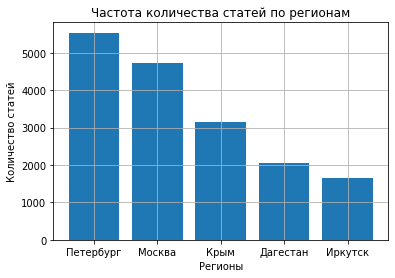

In [ ]:
# использование метода value_counts для подсчета статей отзывавшиеся на разные регионы
region_count = data['region_from_tags'].value_counts()

plt.bar(region_count.keys()[:5], region_count[:5])
plt.grid(True)
plt.title("Частота количества статей по регионам")
plt.ylabel("Количество статей")
plt.xlabel("Регионы")

Text(0.5, 0, 'Годы')

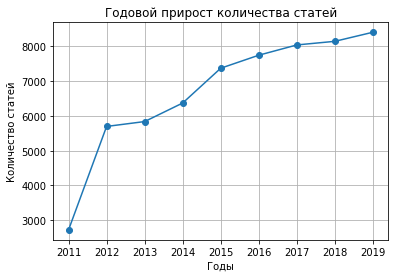

In [ ]:
# использование метода value_counts для подсчета количества статей за разные годовые промежутки
years_count = data['published_date'].astype(str).str[:4].value_counts() # строка кода .astype(str).str[:4] предназначена для отчистки даты такого вида dd-YYYY-mm в вид YYYY
plt.plot(years_count.keys().sort_values(ascending = True), years_count.sort_values(ascending = True), marker = 'o')
plt.grid(True)
plt.title("Годовой прирост количества статей")
plt.ylabel("Количество статей")
plt.xlabel("Годы")

Из данных простых графиков можно заметить:


1.   Чаще всего статьи отсылаются на регионы Санкт - Петербург, Москва, Крым
2.   Случился плавный прирост количества статей к 2019 году, что соответсвует развитию СМИ в нашей стране.



# **2.1) Токенизация, Лемматизация**

*Подключение библиотек*

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.snowball import SnowballStemmer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('all')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_ca

True

In [ ]:
!pip install pymorphy2
import pymorphy2

     |████████████████████████████████| 61kB 3.3MB/s 
     |████████████████████████████████| 8.2MB 6.7MB/s 


In [ ]:
from string import punctuation
punctuation = list(punctuation)

*Функции для работы со столбцами*

In [ ]:
# Удаление пунктуации
def filtring_punct(column):
  elements = [element if element not in punctuation else '' for element in column]
  return ''.join(elements)

# Лемматизация
lemmatizator = pymorphy2.MorphAnalyzer()

def lemmatize_text(text, lemmatizator):
  return [lemmatizator.parse(i)[0].normalized.word for i in text]

# Удаление стоп - слов
stop_words_to_filter = stopwords.words('russian')
def filter_stop_words(text, stop_words_to_filter):
  filtered_text = [elem for elem in text if elem not in stop_words_to_filter]
  return filtered_text

**1) Работа со столбцом текста статей**

In [ ]:
# Удаление пунктуации в столбце Текст
data['prepared_text'] = data['text'].apply(filtring_punct)

In [ ]:
# Токенизация столбца Текст
data['prepared_text'] = data['prepared_text'].apply(word_tokenize)

In [ ]:
# Лемматизация столбца Текст
data['prepared_text'] = data['prepared_text'].apply(lambda x: lemmatize_text(x, lemmatizator))

*Для нормализации текста был выбран метод Лемматизации, так как для нашей задачи Стемминг, который слишком изуковечивает слова, не подходит.*

In [ ]:
data['lemma_text'] = data['prepared_text']

In [ ]:
# Удаление стоп - слов столбца Текст
data['prepared_text'] = data['prepared_text'].apply(lambda x: filter_stop_words(x, stop_words_to_filter))

In [ ]:
# Просмотр первой статьи столбца Текст
data['prepared_text'][0]

['сотрудник',
 'полиция',
 'погибнуть',
 'результат',
 'нападение',
 'пост',
 'дпс',
 'въезд',
 'столица',
 'ингушетия',
 'магас',
 'ингушетия',
 'сообщить',
 'официальный',
 'представитель',
 'мвд',
 'россия',
 'ирина',
 'волк',
 'это',
 'инспектор',
 'исполнение',
 'административный',
 'законодательство',
 'огибдд',
 'отдел',
 'мвд',
 'россия',
 'магас',
 'старший',
 'лейтенант',
 'полиция',
 'зелимхан',
 'кокорхоев',
 '34',
 'год',
 'начать',
 'свой',
 'профессиональный',
 'деятельность',
 'декабрь',
 '2005',
 'год',
 'стажёр',
 'должность',
 'милиционер',
 'взвод',
 'ппс',
 'моб',
 'говд',
 'магас',
 '2011',
 'год',
 'служить',
 'подразделение',
 'гибдд',
 'полицейский',
 'остаться',
 'жена',
 'четверо',
 'несовершеннолетний',
 'ребёнок',
 'руководство',
 'личный',
 'состав',
 'мвд',
 'выразить',
 'соболезнование',
 'родный',
 'близкие',
 'погибший',
 'пообещать',
 'помочь',
 'семья',
 '31',
 'декабрь',
 'около',
 '1730',
 'неизвестный',
 'совершить',
 'нападение',
 'сотрудник',
 '

**2) Работа со столбцом Region_from_tags**

In [ ]:
# Токенизация столбца Region_from_tags
data['regions'] = data['region_from_tags'].apply(word_tokenize)

In [ ]:
data.head(5)

,text,tags,published_date,region_from_tags,prepared_text,lemma_text,regions
0,Сотрудник полиции погиб в результате нападения...,"Ингушетия, Магас, МВД",2019-12-31,Ингушетия,"[сотрудник, полиция, погибнуть, результат, нап...","[сотрудник, полиция, погибнуть, результат, нап...",[Ингушетия]
1,"В больнице скончался второй сотрудник полиции,...","Ингушетия, Магас, МВД, ДПС",2019-12-31,Ингушетия,"[больница, скончаться, второй, сотрудник, поли...","[больница, скончаться, второй, сотрудник, поли...",[Ингушетия]
2,"Установлены личности преступников, напавших на...","Ингушетия, Магас",2019-12-31,Ингушетия,"[установить, личность, преступник, напасть, по...","[установить, личность, преступник, напасть, по...",[Ингушетия]
3,Следователи начали проверку по факту пожара в ...,"Удмуртия, Глазов",2019-12-31,Удмуртия,"[следователь, начать, проверка, факт, пожар, п...","[следователь, начать, проверка, факт, пожар, п...",[Удмуртия]
4,Трое сотрудников полиции получили ранения в ре...,"Ингушетия, Магас",2019-12-31,Ингушетия,"[трое, сотрудник, полиция, получить, ранение, ...","[трое, сотрудник, полиция, получить, ранение, ...",[Ингушетия]


# **2.2) Подготовка набора данных для моделирования**

In [ ]:
# Создание копии Набора Данных, только с нужными столбцами
data_modeling = data.drop(['text', 'tags', 'region_from_tags', 'published_date'], axis = 1)
data_modeling["date"] = data['published_date']

In [ ]:
data_modeling

,prepared_text,lemma_text,regions,date
0,"[сотрудник, полиция, погибнуть, результат, нап...","[сотрудник, полиция, погибнуть, результат, нап...",[Ингушетия],2019-12-31
1,"[больница, скончаться, второй, сотрудник, поли...","[больница, скончаться, второй, сотрудник, поли...",[Ингушетия],2019-12-31
2,"[установить, личность, преступник, напасть, по...","[установить, личность, преступник, напасть, по...",[Ингушетия],2019-12-31
3,"[следователь, начать, проверка, факт, пожар, п...","[следователь, начать, проверка, факт, пожар, п...",[Удмуртия],2019-12-31
4,"[трое, сотрудник, полиция, получить, ранение, ...","[трое, сотрудник, полиция, получить, ранение, ...",[Ингушетия],2019-12-31
...,...,...,...,...
60325,"[ворошиловский, район, волгоград, пожарный, ли...","[ворошиловский, район, волгоград, пожарный, ли...",[Волгоград],2011-07-13
60326,"[москва, обещать, лендлорд, банк, мнение, влия...","[москва, обещать, лендлорд, банк, мнение, влия...",[Москва],2011-07-12
60327,"[результат, самоподрыв, смертник, пост, дпс, с...","[результат, самоподрыв, смертник, пост, дпс, с...",[Ингушетия],2011-07-12
60328,"[сту, дпс, момент, проверка, документ, мужчина...","[сту, дпс, момент, проверка, документ, мужчина...",[Ингушетия],2011-07-12


В этих этапах наша команда подготовила данные для дальнейшего моделирования.

#**3) Моделирование**

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from PIL import Image
from sklearn.manifold import TSNE
import multiprocessing
from sklearn.decomposition import LatentDirichletAllocation

import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis


     |████████████████████████████████| 1.7MB 5.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 9.9MB 37.6MB/s 
     |████████████████████████████████| 15.3MB 197kB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136897 sha256=5fe572309525c22686c5bae61aeaf9de433cecefc00e346b24a24aa2e3b204eb
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyLDAvis
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


Обсудив и взвесив решения мы остановились на выборе алгоритма LDA, так как именно его реализация в библиотеке Gensim, описанная на Мастер - Классе, подходила под задачу нашей команды.

**3.1) Подготовка данных для подачи в алгоритм LDA**

In [ ]:
# функция возвращающая строку из листа преобразованного текста
def to_string(text):
  words = [element for element in text]

  return ' '.join(words)

# применяется для дальнейшего моделирования и подачи текстов
data_modeling['text_modeling'] = data_modeling['prepared_text'].apply(lambda text: to_string(text)) # .apply(to_string)

In [ ]:
# Пример текста для моделирования
texts = data_modeling['text_modeling']
texts[0]

'сотрудник полиция погибнуть результат нападение пост дпс въезд столица ингушетия магас ингушетия сообщить официальный представитель мвд россия ирина волк это инспектор исполнение административный законодательство огибдд отдел мвд россия магас старший лейтенант полиция зелимхан кокорхоев 34 год начать свой профессиональный деятельность декабрь 2005 год стажёр должность милиционер взвод ппс моб говд магас 2011 год служить подразделение гибдд полицейский остаться жена четверо несовершеннолетний ребёнок руководство личный состав мвд выразить соболезнование родный близкие погибший пообещать помочь семья 31 декабрь около 1730 неизвестный совершить нападение сотрудник полиция пост дпс въезд город магас результат нападение пострадать сотрудник полиция нападать нейтрализовать место происшествие выехать руководство мвд регион данные источник агентство нападать микаил мизий убить второй ахмед имагожевый известный армрестлер ранение доставить больница находиться реанимация предположительно являть

In [ ]:
# Функция подсчёта частоты слов в текстах столбца Text_modeling
def get_word_counts(texts):
    wordfreq = {}

    for sentence in texts:  
        for word in nltk.word_tokenize(sentence):
            if word not in wordfreq:
                wordfreq[word] = 0 
            wordfreq[word] += 1
        
    return {k:v for k,v in sorted(wordfreq.items(), key=lambda kv: kv[1], reverse=True)}

word_counts = get_word_counts(texts)

In [ ]:
word_counts

{'год': 53652,
 'сообщить': 53222,
 'который': 50540,
 'человек': 38728,
 'область': 36235,
 'это': 35346,
 'интерфакс': 35337,
 'прессслужба': 34424,
 'дело': 32654,
 'рф': 31442,
 'сказать': 29950,
 'район': 27410,
 'россия': 26559,
 'суд': 26224,
 'время': 25969,
 'также': 25589,
 'агентство': 24082,
 'данные': 22187,
 'москва': 21786,
 'сообщение': 21486,
 'сотрудник': 20476,
 'управление': 19973,
 'уголовный': 19632,
 'находиться': 19546,
 'место': 19348,
 'свой': 19302,
 'регион': 19044,
 'результат': 18676,
 'пострадать': 17939,
 'сообщать': 17752,
 'ребёнок': 17670,
 'слово': 17626,
 'город': 17598,
 'произойти': 17080,
 'дом': 16779,
 'ранее': 16628,
 'рубль': 16402,
 'говориться': 16116,
 'мчс': 15348,
 'работа': 15236,
 'полиция': 14921,
 'глава': 14711,
 'край': 14473,
 'отметить': 14368,
 'весь': 14305,
 'представитель': 14133,
 'орган': 13929,
 'задержать': 13874,
 'погибнуть': 13818,
 'сообщаться': 13133,
 'информация': 12932,
 'пожар': 12742,
 'следственный': 12600,
 'д

In [ ]:
# Очистка от слов, мешающих правильной обработке
filter_words = ['сообщить', 'который', 'отметить', 'это', 'интерфакс', 'прессслужба', 'рф', 'район', 
          'россия', 'время', 'весь', 'всё', 'все', 'мочь', 'глава', 'сообщаться', 'говориться',
          'находиться', 'отметить', 'произойти', 'регион', 'свой', 'город', 'ранее', 'возбудить',
          'житель', 'решение', 'около', 'собеседник', 'стать', 'республика', 'ещё', 'часть',
          'региональный', 'мужчина', 'изз', 'настоящий', 'число', 'местный', 'группа', 'группа',
          'связь', 'принять', 'обнаружить', 'понедельник', 'среда', 'предварительный', 'установить', 'вторник',
          'четверг', 'пятница', 'несколько', 'дать', 'вопрос', 'российский', 'провести', 'добавить',
          'владимир', 'женщина', 'interfaxru', 'московский', 'уточнить', 'сентябрь', 'признать', 'признать',
          'кроме', 'воскресение', 'должный', 'декабрь', 'суббота', 'однако', 'сергей', 'поступить', 'отмечаться',
          'александр', 'август', 'март', 'пока', 'июль', 'октябрь', 'второй', 'май', 'июнь', 'санктпетербург', 'ноябрь','январь',
          'также']

filtered_count = {k:v for k, v in word_counts.items() if k not in filter_words}

In [ ]:
# Очистка от "не" слов
filtered_count = {k:v for k, v in filtered_count.items() if k.isalpha()}

In [ ]:
# Очитска слов по количеству встречаемости в тексте
min_frequency = 20

filtered_count = {k:v for k, v in filtered_count.items() if v > min_frequency}

In [ ]:
len(filtered_count)

15144

In [ ]:
main_voc = filtered_count.keys()

In [ ]:
# создание матрицы встречаеомсти
count_vectorizer = CountVectorizer(vocabulary = main_voc)

count_vectorizer.fit(texts)

term_matrix = count_vectorizer.transform(texts)

In [ ]:
term_matrix

<60327x15144 sparse matrix of type '<class 'numpy.int64'>'
	with 4037128 stored elements in Compressed Sparse Row format>

# **3.2) Работа с алгоритмом LDA**

**Реализация в Scikit - Learn**

In [ ]:
# обучение модели LDA в Scikit - Learn
lda_model = LatentDirichletAllocation(n_components = 10, max_iter = 15, n_jobs = 1, learning_method = 'batch', verbose = 2)

lda_model.fit(term_matrix)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 1 of max_iter: 15


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   51.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 2 of max_iter: 15


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   36.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 3 of max_iter: 15


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   30.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 4 of max_iter: 15


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 5 of max_iter: 15


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 6 of max_iter: 15


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 7 of max_iter: 15


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 8 of max_iter: 15


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 9 of max_iter: 15


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 10 of max_iter: 15


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 11 of max_iter: 15


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 12 of max_iter: 15


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 13 of max_iter: 15


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 14 of max_iter: 15


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iteration: 15 of max_iter: 15


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.2s finished


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=15,
                          mean_change_tol=0.001, n_components=10, n_jobs=1,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=2)

In [ ]:
# функция визуализации вывода результатов Scikit - Learn LDA модели
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [ ]:
terms = count_vectorizer.get_feature_names()
count_terms = term_matrix.toarray().sum(axis=0)

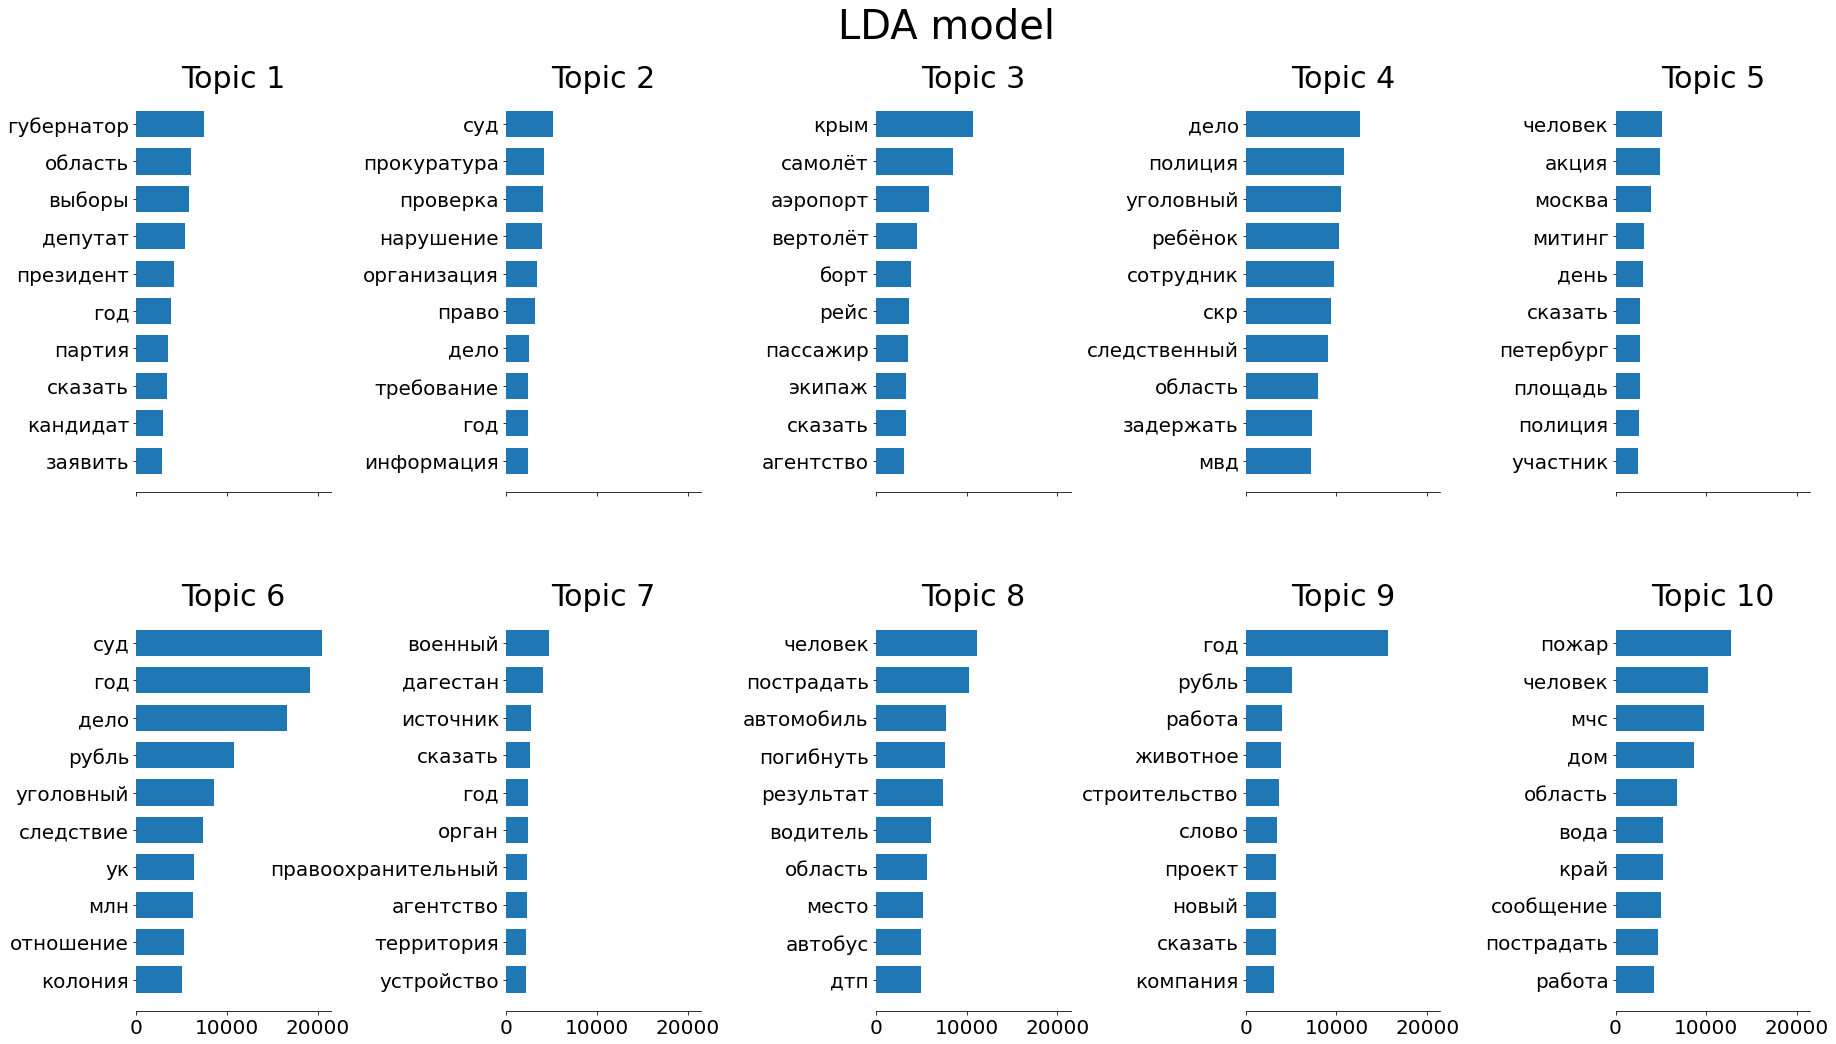

In [ ]:
n_top_words = 10
# тестовый вывод
plot_top_words(lda_model, terms, n_top_words, 'LDA model')

Проанализировав результат работы алгоритма LDA в Scikit - Learn, заметив множество странных, непонятных решений модели при составлении кластеров мы решили продолжить моделирование и дойти до реализации в Gensim.

**Реализация в Gensim**

In [ ]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]


def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]


def filter_by_frequency(texts, word_counts, min_frequency):
    return [[word for word in doc if word_counts.get(word, 1000)> min_frequency] for doc in texts]

In [ ]:
tokenized_texts = data_modeling['prepared_text'].tolist()

In [ ]:
filtered_texts = filter_by_frequency(tokenized_texts, filtered_count, 10)

In [ ]:
id2word = corpora.Dictionary(filtered_texts)
corpus = [id2word.doc2bow(text) for text in filtered_texts]

In [ ]:
# создание и обучение модели
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=42,
                                           update_every=1,
                                           chunksize=100,
                                           passes=5,
                                           alpha='auto',
                                           per_word_topics=True,
                                           )

In [ ]:
# Оценка точности модели LDA путём Перплексии
print('\nПерплексия: ', lda_model.log_perplexity(corpus))

Выходные данные были обрезаны до нескольких последних строк (5000).
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sc


Перплексия:  -8.576493531474277


In [ ]:
# создание визуализации результатов модели
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

In [ ]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.140132 -0.097286       1        1  15.037693
4      0.196854  0.092317       2        1  14.795718
6     -0.066091 -0.276197       3        1  12.878746
7     -0.183638  0.035568       4        1  12.529674
2      0.192276 -0.116198       5        1   9.674264
9      0.087289 -0.026714       6        1   8.660222
1      0.157595  0.059305       7        1   8.594801
3      0.044960  0.189161       8        1   6.063798
0     -0.210713  0.194429       9        1   5.909304
5     -0.078398 -0.054386      10        1   5.855781, topic_info=                    Term          Freq         Total Category  logprob  loglift
263              человек  39119.000000  39119.000000  Default  30.0000  30.0000
724                  суд  21784.000000  21784.000000  Default  29.0000  29.0000
366                 дело  29806.000000  29806.000000  Default  28.0000  28.0000
277                орган  18679.000000  18679.000000  Default  27.0000  27.0000
1096  правоохранительный  13030.000000  13030.000000  Default  26.0000  26.0000
...                  ...           ...           ...      ...      ...      ...
207            нарушение   2093.266276   7948.568079  Topic10  -5.2827   1.5035
110        представитель   2298.452700  18988.391875  Topic10  -5.1892   0.7261
100              полиция   2195.188593  15797.109028  Topic10  -5.2352   0.8642
139             сообщить   2493.479061  63422.147207  Topic10  -5.1078  -0.3984
84                 около   2165.809701  13985.718393  Topic10  -5.2486   0.9725

[639 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
1986       5  0.999125        105
1989       5  0.998362   19летний
1254       1  0.030647       2010
1254       3  0.920471       2010
1254       4  0.048722       2010
...      ...       ...        ...
1060       7  0.040053       явка
1060      10  0.959168       явка
23479      8  0.999603       як42
10410      7  0.999381  ярославль
1441       4  0.999702          –

[1229 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 5, 7, 8, 3, 10, 2, 4, 1, 6])

Вывод алгоритма LDA в Gensim оказался более привлекательным. В особенности после смены параметра количества топиков (num_topics), более детальной чистки матрицы частоты встречаемости слов (для этого использовались написанные на Мастер - Классах функции: удаляющие стоп - слова, проверящие встречаемость слов и т.д) мы получили отличный, по мнению нашей команды, результат, удовлетворяющий поставленной задаче.

# **4) Интерпритация и Визуализация результатов**

**Выдвижение гипотез по результатам моделирования:**


*   Колчиество статей по тематике номер 2, а именно подтематики ДТП, будет увеличиваться в зимние месяцы, ведь, по нашему мнению, зима является самым опасным временем года для поездок на транспорте.  

*  Статьи по тематике номер 5 будут чаще всего отсылаться на регионы Юго - восточной части страны: Кавказ, Дагестан, Чечня и т.п.

*   Количество статей по тематике номер 10 на графиках резко увеличится к 2019 году, потому что в 19 году в стране начали проходить акции в поддержку оппозиции.

*   Количество статей по тематике номер 6 будет увеличиваться Осенью, ведь Осенью начинается пик заболевания ОРВИ и ОРЗ




**1) Подготовка данных**

In [ ]:
data_modeling

,prepared_text,lemma_text,regions,date,text_modeling
0,"[сотрудник, полиция, погибнуть, результат, нап...","[сотрудник, полиция, погибнуть, результат, нап...",[Ингушетия],2019-12-31,сотрудник полиция погибнуть результат нападени...
1,"[больница, скончаться, второй, сотрудник, поли...","[больница, скончаться, второй, сотрудник, поли...",[Ингушетия],2019-12-31,больница скончаться второй сотрудник полиция п...
2,"[установить, личность, преступник, напасть, по...","[установить, личность, преступник, напасть, по...",[Ингушетия],2019-12-31,установить личность преступник напасть пост дп...
3,"[следователь, начать, проверка, факт, пожар, п...","[следователь, начать, проверка, факт, пожар, п...",[Удмуртия],2019-12-31,следователь начать проверка факт пожар психоне...
4,"[трое, сотрудник, полиция, получить, ранение, ...","[трое, сотрудник, полиция, получить, ранение, ...",[Ингушетия],2019-12-31,трое сотрудник полиция получить ранение резуль...
...,...,...,...,...,...
60325,"[ворошиловский, район, волгоград, пожарный, ли...","[ворошиловский, район, волгоград, пожарный, ли...",[Волгоград],2011-07-13,ворошиловский район волгоград пожарный ликвиди...
60326,"[москва, обещать, лендлорд, банк, мнение, влия...","[москва, обещать, лендлорд, банк, мнение, влия...",[Москва],2011-07-12,москва обещать лендлорд банк мнение влияние да...
60327,"[результат, самоподрыв, смертник, пост, дпс, с...","[результат, самоподрыв, смертник, пост, дпс, с...",[Ингушетия],2011-07-12,результат самоподрыв смертник пост дпс селение...
60328,"[сту, дпс, момент, проверка, документ, мужчина...","[сту, дпс, момент, проверка, документ, мужчина...",[Ингушетия],2011-07-12,сту дпс момент проверка документ мужчина приве...


**1.1) Подготовка столбца Date**

In [ ]:
# создание столбца со значением года (YYYY) выпуска статьи
data_modeling['date'] = data_modeling['date'].astype(str)

data_modeling['date'] = data_modeling['date'].str[:4]

data_modeling['date']

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
60325    2011
60326    2011
60327    2011
60328    2011
60329    2011
Name: date, Length: 60327, dtype: object

**1.2) Подготовка столбца Regions**

In [ ]:
data_modeling['regions'] = data['region_from_tags']
data_modeling['regions']

0        Ингушетия
1        Ингушетия
2        Ингушетия
3         Удмуртия
4        Ингушетия
           ...    
60325    Волгоград
60326       Москва
60327    Ингушетия
60328    Ингушетия
60329       Москва
Name: regions, Length: 60327, dtype: object

**1.3) Подготовка столбца Month**

In [ ]:
# создание столбца со значением месяца (mm) и дальнейшее переименование месяцев выпуска статьи
data_modeling['month'] = data['published_date'].astype(str)

data_modeling['month'] = data_modeling['month'].str[5:].str[:2]

month_dict = {'01' : 'Янв',
              '02' : 'Фев',
              '03' : 'Март',
              '04' : 'Апр',
              '05' : 'Май',
              '06' : 'Июнь',
              '07' : 'Июль',
              '08' : 'Авг',
              '09' : 'Сен',
              '10' : 'Окт',
              '11' : 'Нояб',
              '12' : 'Дек'}

data_modeling['month'] = data_modeling['month'].map(month_dict)

*Функция Фильтрации*

In [ ]:
# функция фильтрации текстов на наличие указанного слова, для того что бы
# визуализировать данные тематик
def word_in(tag, texts):
  return tag in texts

Подготовив столбцы для визуализации, переходим к следующему этапу.

**Визуализация**

**Облако слов**

In [ ]:
# создание словаря на основе которого будет построено облако слов
dictionary = dict(zip(terms, count_terms))
dictionary

dictionary = pd.Series(dictionary) 
dictionary = dictionary.sort_values(ascending=False) 

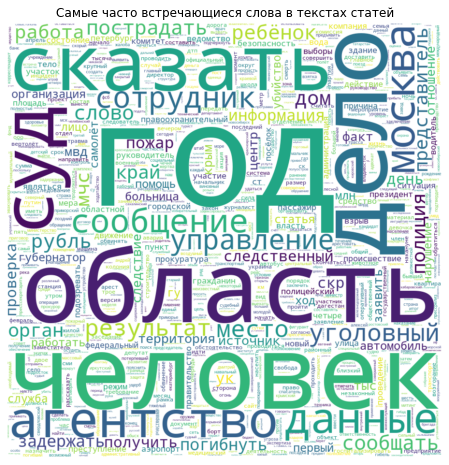

In [ ]:
# создание двух переменных, обозначающих индексы отсортированных значений и сами значения
names = dictionary.index
values = dictionary.values

# построение облака слов
def plot_word_cloud(text):
    
    wordcloud = WordCloud(background_color="white", max_words=1000, width=900, height=900, collocations=False)
    wordcloud = wordcloud.generate_from_frequencies(text)
    plt.figure(figsize=(12, 8))
    plt.title("Самые часто встречающиеся слова в текстах статей")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show() 

    
plot_word_cloud(dictionary)

**1) Тематика "Дипломатия"**

В данном кластере встретилось большое количество слов по типу Глава, Президент, Законы, Дума, поэтому тематика получило такое название.

*По мнению нашей команды, в исследовании тематики про Дипломатию нет смысла, так как эта тема не является проблемой регионов*

**2) Тематика "ЧП"**

В данном кластере встретилось большое количество слов по типу ДТП, Полиция, Авария, поэтому тематика получило такое название.

In [ ]:
# фильтрация текстов статей по самому популярному слову статьи
tag = 'погибнуть'
condition = data_modeling['text_modeling'].apply(lambda x: word_in(tag, x))

In [ ]:
hp_theme = data_modeling[condition]

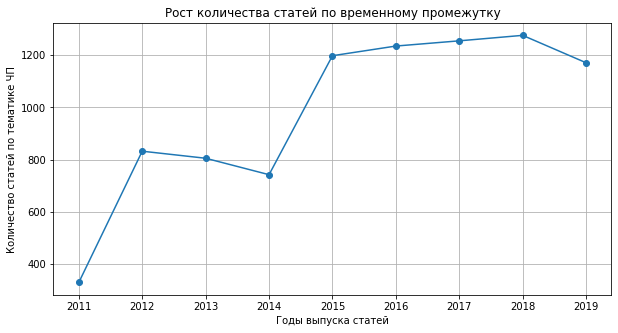

In [ ]:
width=10
height=5
plt.subplots(figsize=(width, height))

year = hp_theme['date'].sort_values().unique()

frequency = [len(hp_theme[hp_theme['date'] == year[0]]), len(hp_theme[hp_theme['date'] == year[1]]),
             len(hp_theme[hp_theme['date'] == year[2]]), len(hp_theme[hp_theme['date'] == year[3]]),
             len(hp_theme[hp_theme['date'] == year[4]]), len(hp_theme[hp_theme['date'] == year[5]]),
             len(hp_theme[hp_theme['date'] == year[6]]), len(hp_theme[hp_theme['date'] == year[7]]),
             len(hp_theme[hp_theme['date'] == year[8]])]

plt.ylabel('Количество статей по тематике ЧП')
plt.xlabel('Годы выпуска статей')
plt.title("Рост количества статей по временному промежутку")
plt.grid(True)
plt.plot(year, frequency, marker = "o")   

<BarContainer object of 5 artists>

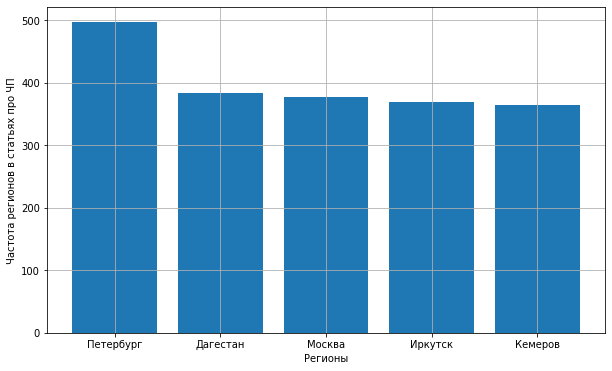

In [ ]:
width=10
height=6
plt.subplots(figsize=(width, height))

regions = hp_theme['regions'].value_counts().keys()
frequency = hp_theme['regions'].value_counts()[:5].tolist()

plt.ylabel('Частота регионов в статьях про ЧП')
plt.xlabel('Регионы')
plt.grid(True)
plt.bar(regions[:5], frequency)

2.1) Визуализация количества статей по теме ДТП из тематики "ЧП"

In [ ]:
tag = 'дтп'
condition = data_modeling['text_modeling'].apply(lambda x: word_in(tag, x))

In [ ]:
dtp_theme = data_modeling[condition]

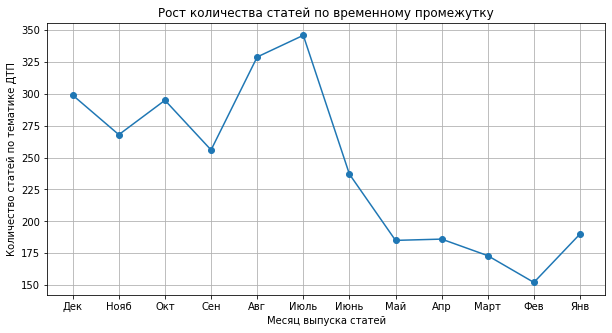

In [ ]:
width=10
height=5
plt.subplots(figsize=(width, height))

month = dtp_theme['month'].unique()
frequency = [len(dtp_theme[dtp_theme['month'] == month[0]]), len(dtp_theme[dtp_theme['month'] == month[1]]),
             len(dtp_theme[dtp_theme['month'] == month[2]]), len(dtp_theme[dtp_theme['month'] == month[3]]),
             len(dtp_theme[dtp_theme['month'] == month[4]]), len(dtp_theme[dtp_theme['month'] == month[5]]),
             len(dtp_theme[dtp_theme['month'] == month[6]]), len(dtp_theme[dtp_theme['month'] == month[7]]),
             len(dtp_theme[dtp_theme['month'] == month[8]]), len(dtp_theme[dtp_theme['month'] == month[9]]),
             len(dtp_theme[dtp_theme['month'] == month[10]]), len(dtp_theme[dtp_theme['month'] == month[11]])]

plt.ylabel('Количество статей по тематике ДТП')
plt.xlabel('Месяц выпуска статей')
plt.title("Рост количества статей по временному промежутку")
plt.grid(True)
plt.plot(month, frequency, marker = "o")

<BarContainer object of 5 artists>

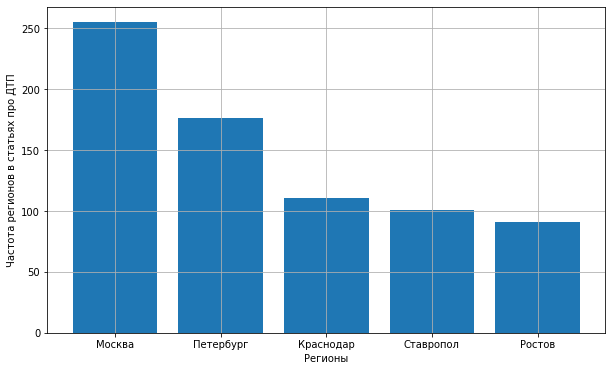

In [ ]:
width=10
height=6
plt.subplots(figsize=(width, height))

regions = dtp_theme['regions'].value_counts().keys()
frequency = dtp_theme['regions'].value_counts()[:5].tolist()

plt.ylabel('Частота регионов в статьях про ДТП')
plt.xlabel('Регионы')
plt.grid(True)
plt.bar(regions[:5], frequency)

Из данных графиков можно заметить несколько фактов:

Вывод обобщающий тематику ЧП:
1.   Количество статей про ЧП увеличилось, возможно, потому что такие ситуации начали чаще освещаться в СМИ.
2.   Регионы, встречающиеся в статьях про ЧП чаще всего: Санкт - Петербург, Москва, Дагестан.

Вывод о визуализации темы ДТП:


1.  Наша гипотеза о росте количества статей про ДТП зимой не потвердилась. На графике видно, что Количество ДТП, освещаемых СМИ, выростает в летний сезон и именно в южных регионах России, так как множество людей отправляются в отпуск на юг на автотранспорте.





**3) Тематика "Коррупция"**


В данном кластере встретилось большое количество слов по типу Суд, УК, Взятка,поэтому тематика получило такое название.

In [ ]:
# фильтрация текстов статей по самому популярному слову статьи
tag = 'суд'
condition = data_modeling['text_modeling'].apply(lambda x: word_in(tag, x))

In [ ]:
corrup_theme = data_modeling[condition]

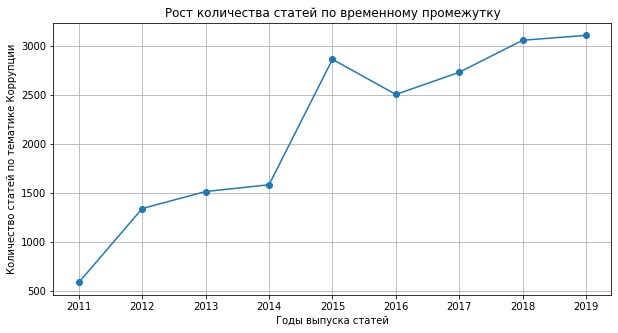

In [ ]:
width=10
height=5
plt.subplots(figsize=(width, height))

year = corrup_theme['date'].sort_values().unique()
frequency = [len(corrup_theme[corrup_theme['date'] == year[0]]), len(corrup_theme[corrup_theme['date'] == year[1]]),
             len(corrup_theme[corrup_theme['date'] == year[2]]), len(corrup_theme[corrup_theme['date'] == year[3]]),
             len(corrup_theme[corrup_theme['date'] == year[4]]), len(corrup_theme[corrup_theme['date'] == year[5]]),
             len(corrup_theme[corrup_theme['date'] == year[6]]), len(corrup_theme[corrup_theme['date'] == year[7]]),
             len(corrup_theme[corrup_theme['date'] == year[8]])]

plt.ylabel('Количество статей по тематике Коррупции')
plt.xlabel('Годы выпуска статей')
plt.title("Рост количества статей по временному промежутку")
plt.grid(True)
plt.plot(year, frequency, marker = "o")  

<BarContainer object of 5 artists>

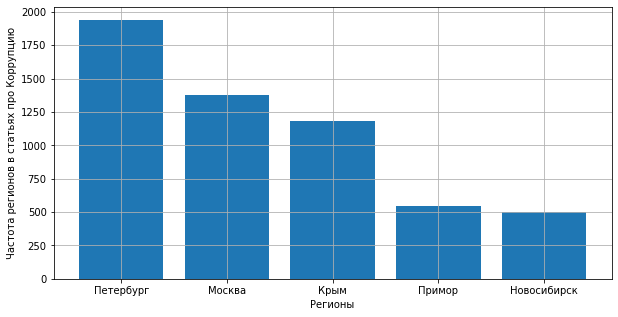

In [ ]:
width=10
height=5
plt.subplots(figsize=(width, height))

regions = corrup_theme['regions'].value_counts().keys()
frequency = corrup_theme['regions'].value_counts()[:5].tolist()

plt.ylabel('Частота регионов в статьях про Коррупцию')
plt.xlabel('Регионы')
plt.grid(True)
plt.bar(regions[:5], frequency)

3.1) Визуализация количества статей по теме Взяток из тематики "Коррупция"

In [ ]:
tag = 'взятка'
condition = data_modeling['text_modeling'].apply(lambda x: word_in(tag, x))

In [ ]:
money_theme = data_modeling[condition]

<BarContainer object of 5 artists>

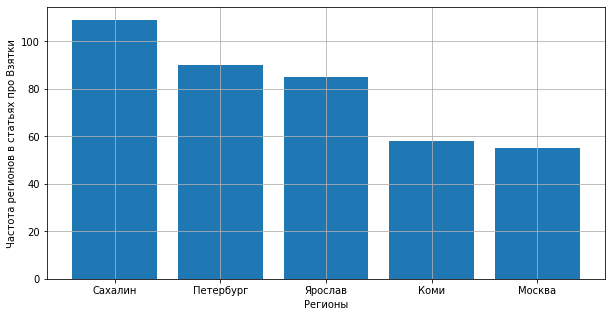

In [ ]:
width=10
height=5
plt.subplots(figsize=(width, height))

regions = money_theme['regions'].value_counts().keys()
frequency = money_theme['regions'].value_counts()[:5].tolist()

plt.ylabel('Частота регионов в статьях про Взятки')
plt.xlabel('Регионы')
plt.grid(True)
plt.bar(regions[:5], frequency)

Из данных графиков можно заметить несколько фактов:

Вывод обобщающий тематику Коррупции:


1.   Количество статей про Коррупцию увеличилось, возможно, потому что такие ситуации начали чаще освещаться в СМИ.
2.   Регионы, встречающиеся в статьях про Коррупцию чаще всего: Санкт - Петербург, Москва, Крым.




Вывод о визуализации темы Взяток:


1.   Количество статей о взятках, освещаемых СМИ, очень часто отсылатеся на регион Сахалин и в дальнейшем Санкт - Петербург, Москва, Ярославль.




**4) Смешанная тематика "Роспотребнадзор"**

In [ ]:
# фильтрация текстов статей по самому популярному слову статьи
tag = 'роспотребнадзор'
condition = data_modeling['text_modeling'].apply(lambda x: word_in(tag, x))

In [ ]:
poison_theme = data_modeling[condition]

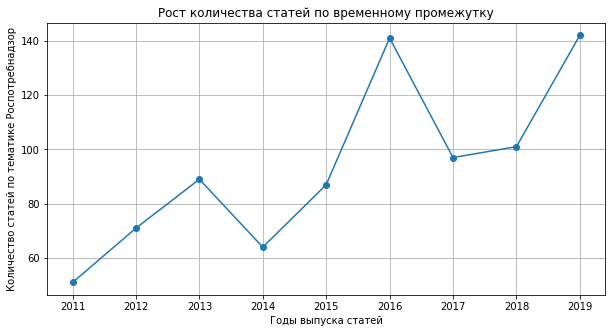

In [ ]:
width=10
height=5
plt.subplots(figsize=(width, height))

year = poison_theme['date'].sort_values().unique()
frequency = [len(poison_theme[poison_theme['date'] == year[0]]), len(poison_theme[poison_theme['date'] == year[1]]),
             len(poison_theme[poison_theme['date'] == year[2]]), len(poison_theme[poison_theme['date'] == year[3]]),
             len(poison_theme[poison_theme['date'] == year[4]]), len(poison_theme[poison_theme['date'] == year[5]]),
             len(poison_theme[poison_theme['date'] == year[6]]), len(poison_theme[poison_theme['date'] == year[7]]),
             len(poison_theme[poison_theme['date'] == year[8]])]

plt.ylabel('Количество статей по тематике Роспотребнадзор')
plt.xlabel('Годы выпуска статей')
plt.title("Рост количества статей по временному промежутку")
plt.grid(True)
plt.plot(year, frequency, marker = "o")  

<BarContainer object of 5 artists>

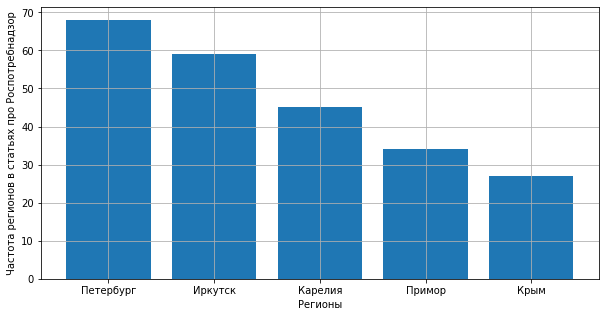

In [ ]:
width=10
height=5
plt.subplots(figsize=(width, height))

regions = poison_theme['regions'].value_counts().keys()
frequency = poison_theme['regions'].value_counts()[:5].tolist()

plt.ylabel('Частота регионов в статьях про Роспотребнадзор')
plt.xlabel('Регионы')
plt.grid(True)
plt.bar(regions[:5], frequency)

**5) Тематика "Криминал"**

В данном кластере встретилось большое количество слов по типу Убийство, Правоохранительные органы, бандиты поэтому тематика получило такое название.

In [ ]:
# фильтрация текстов статей по самому популярному слову статьи
tag = 'правоохранительный'
condition = data_modeling['text_modeling'].apply(lambda x: word_in(tag, x))

In [ ]:
guard_theme = data_modeling[condition]

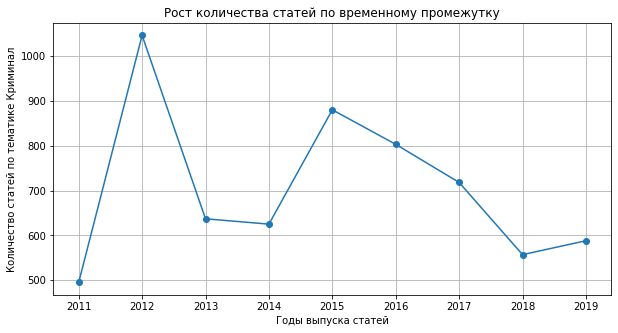

In [ ]:
width=10
height=5
plt.subplots(figsize=(width, height))

year = guard_theme['date'].sort_values().unique()
frequency = [len(guard_theme[guard_theme['date'] == year[0]]), len(guard_theme[guard_theme['date'] == year[1]]),
             len(guard_theme[guard_theme['date'] == year[2]]), len(guard_theme[guard_theme['date'] == year[3]]),
             len(guard_theme[guard_theme['date'] == year[4]]), len(guard_theme[guard_theme['date'] == year[5]]),
             len(guard_theme[guard_theme['date'] == year[6]]), len(guard_theme[guard_theme['date'] == year[7]]),
             len(guard_theme[guard_theme['date'] == year[8]])]

plt.ylabel('Количество статей по тематике Криминал')
plt.xlabel('Годы выпуска статей')
plt.title("Рост количества статей по временному промежутку")
plt.grid(True)
plt.plot(year, frequency, marker = "o")     

<BarContainer object of 5 artists>

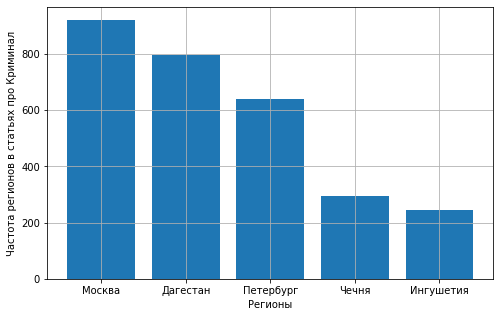

In [ ]:
width=8
height=5
plt.subplots(figsize=(width, height))

regions = guard_theme['regions'].value_counts().keys()
frequency = guard_theme['regions'].value_counts()[:5].tolist()

plt.ylabel('Частота регионов в статьях про Криминал')
plt.xlabel('Регионы')
plt.grid(True)
plt.bar(regions[:5], frequency)

5.1) Визуализация количества статей по теме Убийств из тематики "Криминал"

In [ ]:
# фильтрация текстов статей по самому популярному слову статьи
tag = 'убить'
condition = data_modeling['text_modeling'].apply(lambda x: word_in(tag, x))

In [ ]:
kill_theme = data_modeling[condition]

<BarContainer object of 5 artists>

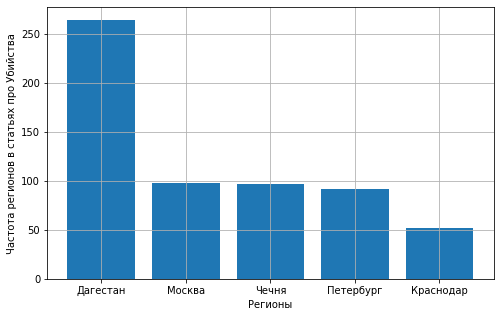

In [ ]:
width=8
height=5
plt.subplots(figsize=(width, height))

regions = kill_theme['regions'].value_counts().keys()
frequency = kill_theme['regions'].value_counts()[:5].tolist()

plt.ylabel('Частота регионов в статьях про Убийства')
plt.xlabel('Регионы')
plt.grid(True)
plt.bar(regions[:5], frequency)

Из данных графиков можно заметить несколько фактов:

Вывод обобщающий тематику Криминала:


1.   Количество статей про Криминал значительно уменьшилось, это говорит о том, что правительство начало внедрять более жесткие меры наказния и заниматься сферой преступности более усилено.
2.   Регионы, встречающиеся в статьях про Криминал чаще всего: Дагестан, Москва, Чечня, Ингушетия и Петергбург.

Вывод о визуализации темы Убийств:


1.   Количество статей о убийствах, освещаемых СМИ, очень часто отсылатеся на регион Дагестан, то есть, можно понять, что Дагестан является не самым безопасным регионом.

Наша гипотеза о неблагополучных регионах юго - востока страны потвердилась, это видно на графике и в нашем выводе.


**6) Тематика "Санитария - Заболевания"**

В данном кластере встретилось большое количество слов по типу Заболевания, Эпидемия, Санитария поэтому тематика получило такое название.

In [ ]:
# фильтрация текстов статей по самому популярному слову статьи
tag = 'санитарный'
condition = data_modeling['text_modeling'].apply(lambda x: word_in(tag, x))

In [ ]:
virus_theme = data_modeling[condition]

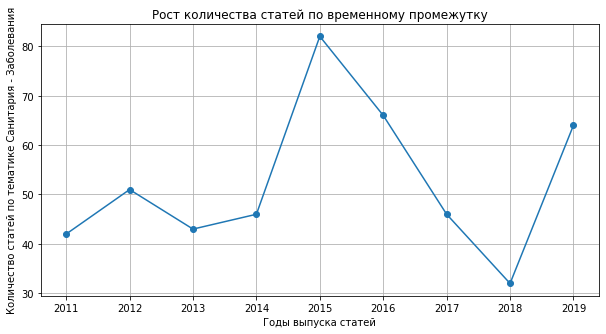

In [ ]:
width=10
height=5
plt.subplots(figsize=(width, height))

year = virus_theme['date'].sort_values().unique()
frequency = [len(virus_theme[virus_theme['date'] == year[0]]), len(virus_theme[virus_theme['date'] == year[1]]),
             len(virus_theme[virus_theme['date'] == year[2]]), len(virus_theme[virus_theme['date'] == year[3]]),
             len(virus_theme[virus_theme['date'] == year[4]]), len(virus_theme[virus_theme['date'] == year[5]]),
             len(virus_theme[virus_theme['date'] == year[6]]), len(virus_theme[virus_theme['date'] == year[7]]),
             len(virus_theme[virus_theme['date'] == year[8]])]

plt.ylabel('Количество статей по тематике Санитария - Заболевания')
plt.xlabel('Годы выпуска статей')
plt.title("Рост количества статей по временному промежутку")
plt.grid(True)
plt.plot(year, frequency, marker = "o") 

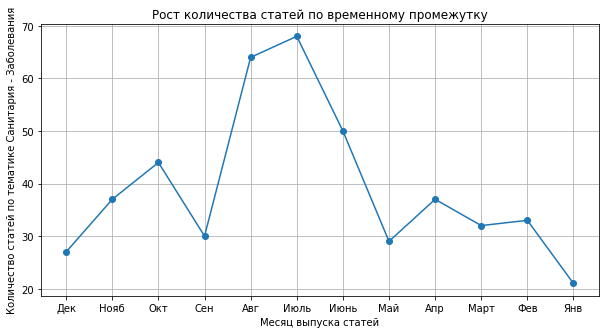

In [ ]:
width=10
height=5
plt.subplots(figsize=(width, height))

month = virus_theme['month'].unique()
frequency = [len(virus_theme[virus_theme['month'] == month[0]]), len(virus_theme[virus_theme['month'] == month[1]]),
             len(virus_theme[virus_theme['month'] == month[2]]), len(virus_theme[virus_theme['month'] == month[3]]),
             len(virus_theme[virus_theme['month'] == month[4]]), len(virus_theme[virus_theme['month'] == month[5]]),
             len(virus_theme[virus_theme['month'] == month[6]]), len(virus_theme[virus_theme['month'] == month[7]]),
             len(virus_theme[virus_theme['month'] == month[8]]), len(virus_theme[virus_theme['month'] == month[9]]),
             len(virus_theme[virus_theme['month'] == month[10]]), len(virus_theme[virus_theme['month'] == month[11]])]

plt.ylabel('Количество статей по тематике Санитария - Заболевания')
plt.xlabel('Месяц выпуска статей')
plt.title("Рост количества статей по временному промежутку")
plt.grid(True)
plt.plot(month, frequency, marker = "o")

<BarContainer object of 5 artists>

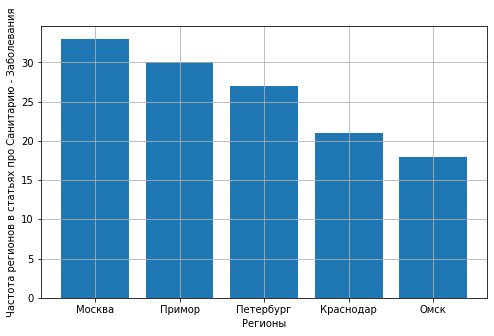

In [ ]:
width=8
height=5
plt.subplots(figsize=(width, height))

regions = virus_theme['regions'].value_counts().keys()
frequency = virus_theme['regions'].value_counts()[:5].tolist()

plt.ylabel('Частота регионов в статьях про Санитарию - Заболевания')
plt.xlabel('Регионы')
plt.grid(True)
plt.bar(regions[:5], frequency)

Из данных графиков можно заметить несколько фактов:

Вывод обобщающий тематику Санитарного Состояния регионов:


1.   Количество статей про Заболевания значительно увеличивалось в 2019 и 2015 годах, возможно, это отсылает нас на то, что в 2015 году был пик заражений вирусом Эбола, а в 2019 появление вируса Covid-19.
2.   Регионы, встречающиеся в статьях про Санитарию и Эпидем обстановку чаще всего: Москва и Приморский Край, так как Приморский Край граничит с КНДР, в которой началась эпидемия Covid - 19.

Наша гипотеза о статьях об обострении вирусных заболеваний осенью не потвердилась, хотя был заметен небольшой прирост количества статей в этот период.

**7) Тематику 7 кластера, к сожалению определить не удалось**


**8) Тематика "Катастрофы"**

В данном кластере встретилось большое количество слов по типу Авиакатострофа, Самолёты, Возгорания, поэтому тематика получило такое название.

In [ ]:
# фильтрация текстов статей по самому популярному слову статьи
tag = 'крушение'
condition = data_modeling['text_modeling'].apply(lambda x: word_in(tag, x))

In [ ]:
boom_theme = data_modeling[condition]

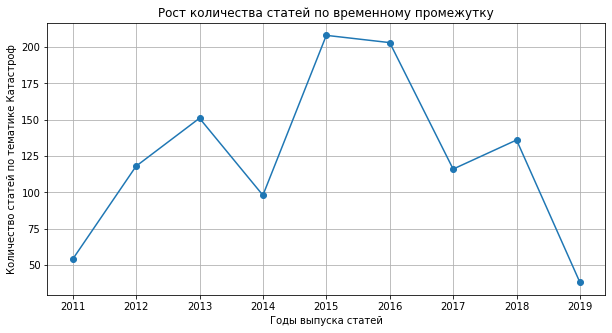

In [ ]:
width=10
height=5
plt.subplots(figsize=(width, height))

year = boom_theme['date'].sort_values().unique()
frequency = [len(boom_theme[boom_theme['date'] == year[0]]), len(boom_theme[boom_theme['date'] == year[1]]),
             len(boom_theme[boom_theme['date'] == year[2]]), len(boom_theme[boom_theme['date'] == year[3]]),
             len(boom_theme[boom_theme['date'] == year[4]]), len(boom_theme[boom_theme['date'] == year[5]]),
             len(boom_theme[boom_theme['date'] == year[6]]), len(boom_theme[boom_theme['date'] == year[7]]),
             len(boom_theme[boom_theme['date'] == year[8]])]

plt.ylabel('Количество статей по тематике Катастроф')
plt.xlabel('Годы выпуска статей')
plt.title("Рост количества статей по временному промежутку")
plt.grid(True)
plt.plot(year, frequency, marker = "o")   

<BarContainer object of 5 artists>

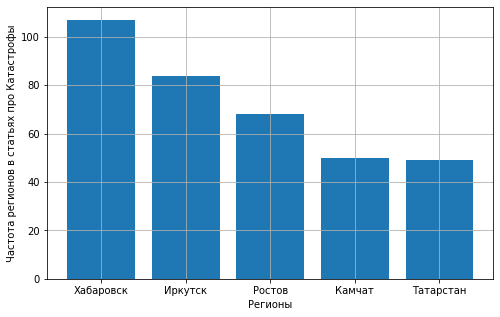

In [ ]:
width=8
height=5
plt.subplots(figsize=(width, height))

regions = boom_theme['regions'].value_counts().keys()
frequency = boom_theme['regions'].value_counts()[:5].tolist()

plt.ylabel('Частота регионов в статьях про Катастрофы')
plt.xlabel('Регионы')
plt.grid(True)
plt.bar(regions[:5], frequency)

Из данных графиков можно заметить несколько фактов:

Вывод обобщающий тематику Катастроф:


1.   Регионы, встречающиеся в статьях про Катастрофы чаще всего: Хабаровск, Иркутск и Ростов. Если иследовать тему катастроф в перечисленных регионах подробнее, то можно заметить большое количество авиакатостроф с участием пилотов - частников.


**9) Тематика "Мин Обороны"**


В данном кластере встретилось большое количество слов по типу Войска, Мин Обороны, поэтому тематика получило такое название.

In [ ]:
# фильтрация текстов статей по самому популярному слову статьи
tag = 'минобороны'
condition = data_modeling['text_modeling'].apply(lambda x: word_in(tag, x))

In [ ]:
army_theme = data_modeling[condition]

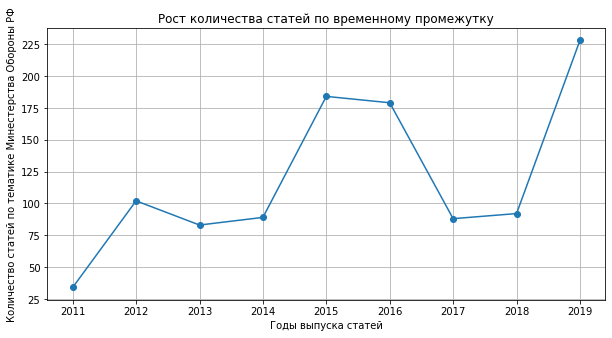

In [ ]:
width=10
height=5
plt.subplots(figsize=(width, height))

year = army_theme['date'].sort_values().unique()
frequency = [len(army_theme[army_theme['date'] == year[0]]), len(army_theme[army_theme['date'] == year[1]]),
             len(army_theme[army_theme['date'] == year[2]]), len(army_theme[army_theme['date'] == year[3]]),
             len(army_theme[army_theme['date'] == year[4]]), len(army_theme[army_theme['date'] == year[5]]),
             len(army_theme[army_theme['date'] == year[6]]), len(army_theme[army_theme['date'] == year[7]]),
             len(army_theme[army_theme['date'] == year[8]])]

plt.ylabel('Количество статей по тематике Минестерства Обороны РФ')
plt.xlabel('Годы выпуска статей')
plt.title("Рост количества статей по временному промежутку")
plt.grid(True)
plt.plot(year, frequency, marker = "o")

Из данного графика можно заметить факт:



1.   Количество статей по темтике Мин. Обороны резко увеличилось к 2019 году, что соответсвует реальной ситуации. Во - первых, началась массовая модернизация армии, во - вторых, в 2020 году праздновалось 75 - летие Великой Победы ВОВ, то есть к 2019 году было большое количество статей про подготовку к празднованию и параду.



**10) Тематика "Митинги - Акции"**

В данном кластере встретилось большое количество слов по типу Акция, несанкционированный митинг, Оппозиция, поэтому тематика получило такое название.

In [ ]:
# фильтрация текстов статей по самому популярному слову статьи
tag = 'акция'
condition = data_modeling['text_modeling'].apply(lambda x: word_in(tag, x))

In [ ]:
meeting_theme = data_modeling[condition]

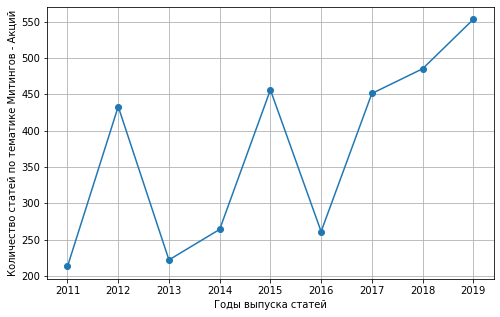

In [ ]:
width=10
height=5
plt.subplots(figsize=(width, height))

year = meeting_theme['date'].sort_values().unique()
frequency = [len(meeting_theme[meeting_theme['date'] == year[0]]), len(meeting_theme[meeting_theme['date'] == year[1]]),
             len(meeting_theme[meeting_theme['date'] == year[2]]), len(meeting_theme[meeting_theme['date'] == year[3]]),
             len(meeting_theme[meeting_theme['date'] == year[4]]), len(meeting_theme[meeting_theme['date'] == year[5]]),
             len(meeting_theme[meeting_theme['date'] == year[6]]), len(meeting_theme[meeting_theme['date'] == year[7]]),
             len(meeting_theme[meeting_theme['date'] == year[8]])]

plt.ylabel('Количество статей по тематике Митингов - Акций')
plt.xlabel('Годы выпуска статей')
plt.grid(True)
plt.plot(year, frequency, marker = "o")               

<BarContainer object of 5 artists>

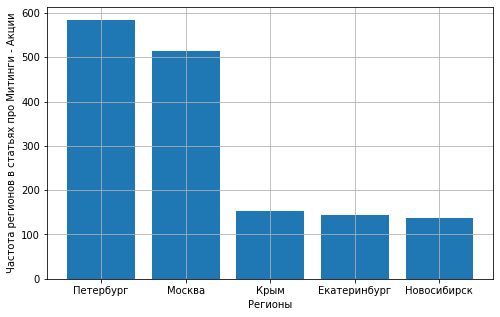

In [ ]:
width=8
height=5
plt.subplots(figsize=(width, height))

regions = meeting_theme['regions'].value_counts().keys()
frequency = meeting_theme['regions'].value_counts()[:5].tolist()

plt.ylabel('Частота регионов в статьях про Митинги - Акции')
plt.xlabel('Регионы')
plt.grid(True)
plt.bar(regions[:5], frequency)

Из данных графиков можно заметить несколько фактов:

Вывод обобщающий тематику Митингов и Акций:


1.   Регионы, встречающиеся в статьях про Митинги чаще всего: Санкт - Петербург и Москва. Именно в этих городах проходили самые крупные акции протестов. Что указывает на Нестабильную полит. обстоновку в этих регионах.
2.   Прирост количества статей о митингах увеличился в 2019 году, так как в это время началась активная деятельность оппозиционеров и привлечения народа к ним.

Гипотеза о приросте количества статей по тематике номер 10 потвердилась и была описана сверху + видно на графике.

**Использование Google Trends.**

Для подтверждения информации полученной благодаря графикам мы воспользовались сервисом Google Trends. Google Trends - сервис, позволяющий узнть тренды поисковых запросов за разные временные промежутки. С помощью данного сервиса мы проверили наши заключения и смогли убедиться в точности нашего анализа.


# **Заключение**

Наша цель была достигнута, с помощью анализа текстов наша команда смогла выделить основные тематики новостных статей и найти проблемные места регионов РФ. Так же удалось визуализовать наш вывод в виде карты. Гипотеза о том, что с помощью анализа новостных статей наша команда сумеет выяснить проблемы регионов доказана. Гипотезы, образованные в начале блока визуализации, были разобраны сверху.

Вывод в виде карты (При нажатии на маркер открывается меню и список проблем присущих региону):

In [ ]:
!pip install folium

In [ ]:
# визуализация карты с помощью библиотеки разобранной на консультации
import folium
russia = folium.Map(location = [65, 110], zoom_start = 3.5)

regions_dict = {'55.79335421217256, 37.602847208010594' : 'Москва',
                '59.982530773948206, 30.61673035075687' : 'Санкт - Петербург',
                '48.50144865621541, 135.12485539781594' : 'Хабаровск',
                '43.95246753591122, 133.28383110511237' : 'Приморск',
                '42.9772302794896, 47.4871029139164' : 'Дагестан',
                '43.319846427374344, 45.70191617806771' : 'Чечня',
                '50.683720598784944, 143.01054291790547' : 'Сахалин',
                '45.03421071494269, 38.97981990068664' : 'Краснодар',
                '47.28697882632846, 39.67960788562682' : 'Ростов',
                '52.30775066907193, 104.30189250650638' : 'Иркутск'}
# Москва
folium.Marker(location = [55.79335421217256, 37.602847208010594], popup = 'Тематики: Митинги, Криминал, ЧП, Заболевания', icon = folium.Icon(color = 'red')).add_to(russia)
# Санкт - Петербург
folium.Marker(location = [59.982530773948206, 30.61673035075687], popup = 'Тематики: Митинги, Коррупция, Роспотребнадзор, ЧП, Заболевания', icon = folium.Icon(color = 'red')).add_to(russia)
# Хабаровск
folium.Marker(location = [48.50144865621541, 135.12485539781594], popup = 'Тематики: Заболевания, Коррупция, Митинги, Катастрофы', icon = folium.Icon(color = 'orange')).add_to(russia)
# Приморск
folium.Marker(location = [43.95246753591122, 133.28383110511237], popup = 'Тематики: Заболевания', icon = folium.Icon(color = 'green')).add_to(russia)
# Дагестан
folium.Marker(location = [42.9772302794896, 47.4871029139164], popup = 'Тематики: Криминал, Убийство', icon = folium.Icon(color = 'red')).add_to(russia)
# Чечня
folium.Marker(location = [43.319846427374344, 45.70191617806771], popup = 'Тематики: Криминал, Убийство', icon = folium.Icon(color = 'red')).add_to(russia)
# Сахалин
folium.Marker(location = [50.683720598784944, 143.01054291790547], popup = 'Тематики: Коррупция, Взятки', icon = folium.Icon(color = 'orange')).add_to(russia)
# Краснодар
folium.Marker(location = [45.03421071494269, 38.97981990068664], popup = 'Тематики: ЧП, ДТП, Убийства, Санитария', icon = folium.Icon(color = 'red')).add_to(russia)
# Ростов
folium.Marker(location = [47.28697882632846, 39.67960788562682], popup = 'Тематики: ЧП, ДТП, Катастрофы', icon = folium.Icon(color = 'orange')).add_to(russia)
# Иркутск
folium.Marker(location = [52.30775066907193, 104.30189250650638], popup = 'Тематики: Катастрофы, Роспотребнадзор, ЧП', icon = folium.Icon(color = 'orange')).add_to(russia)

russia